在学习图像增广的时候，想在一张画布上展示多张图片，包括原始图片和图像增广后的图片。开始以为很简单的事实，用plt构建一个画布，划分多个子区域，每个字区域显示一张图片。但是plt总是伸缩图片，使每张图片占满整个子区域。我找了一天的资料才解决这个问题，今天记录下来。

In [8]:
import  math
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
img1 = Image.open("img/cat1.jpg")
img2 = Image.open("img/cat2.jpg")

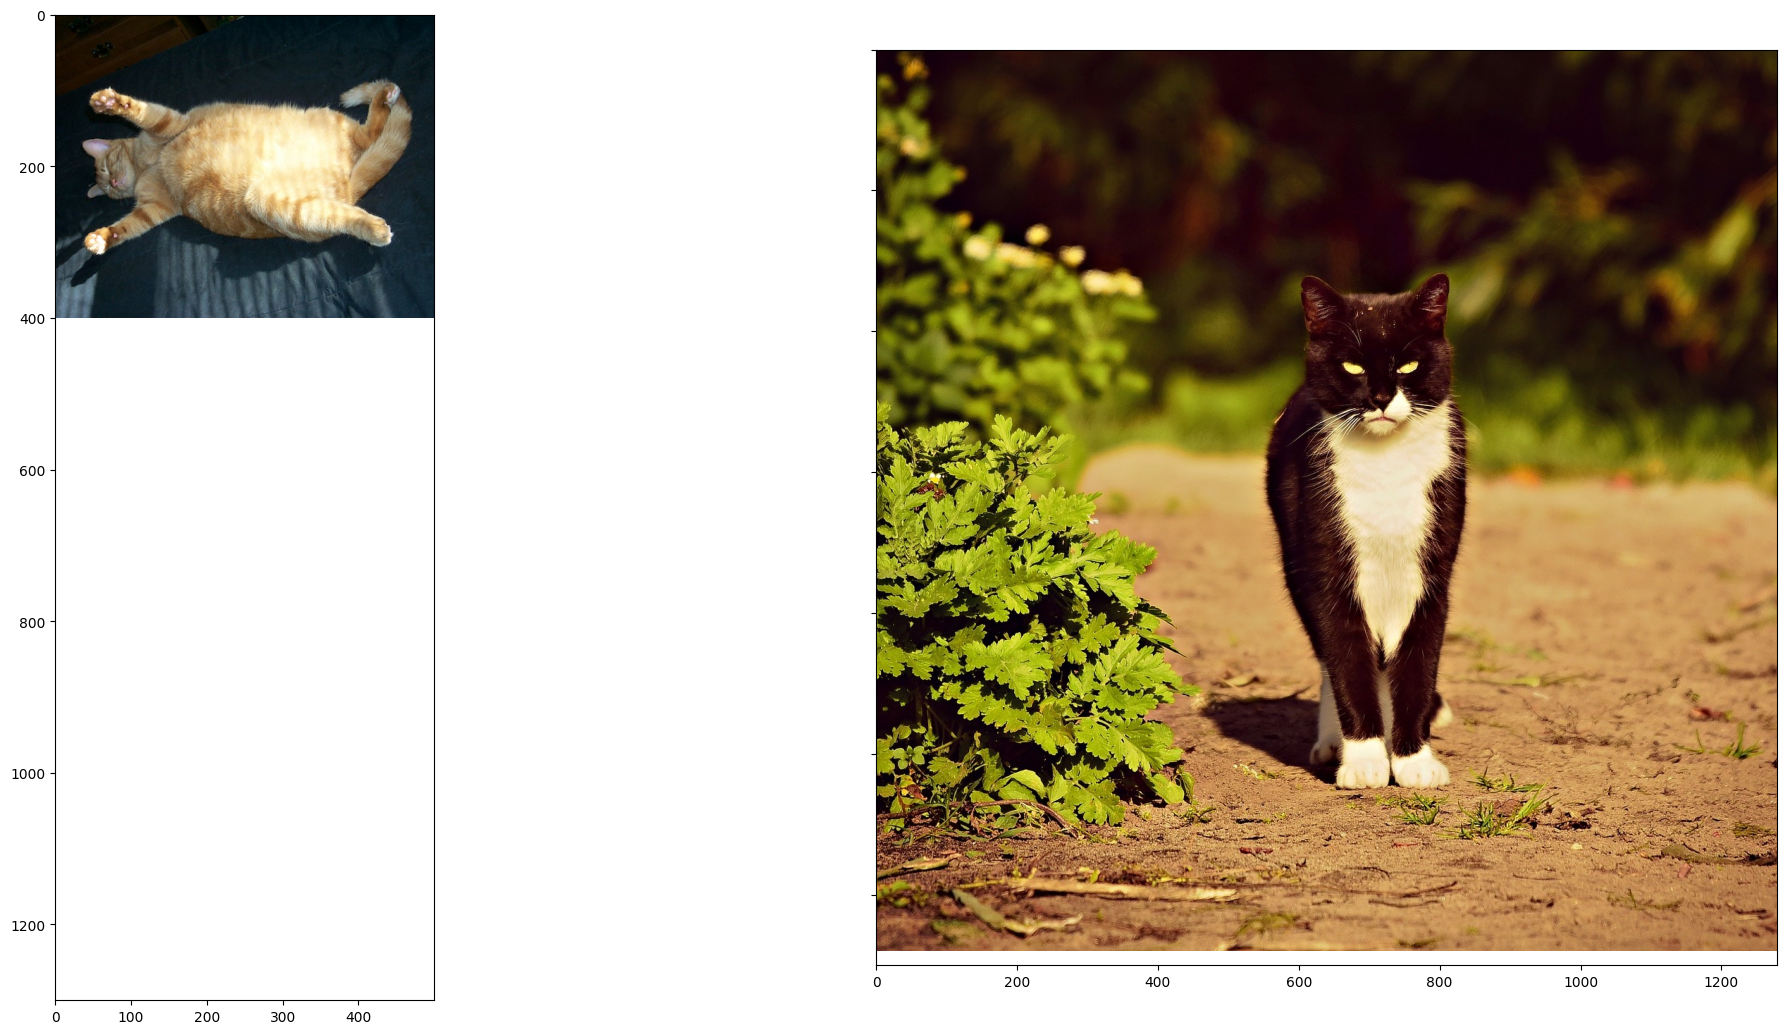

In [17]:
def show_images(imgs):
    '''
    打印多张图片，每行多张最多4张图片，要求保持图片比例不变
    '''

    # 计算图片占用行/列数
    num_imgs = len(imgs)
    num_cols = min(num_imgs, 4)
    num_rows = math.ceil(num_imgs / num_cols)

    # 计算所有图片最大宽和最大高。
    # 最大高，即最大的y坐标
    max_width = reduce(lambda x, y : x if x.size[0] > y.size[0] else y, imgs).size[0]
    max_height = reduce(lambda x, y : x if x.size[1] > y.size[1] else y, imgs).size[1]

    # dpi 即每英寸像素数
    dpi = float(plt.rcParams['figure.dpi'])
    figsize = max_width / dpi * num_cols, max_height / dpi * num_rows

    # sharey 是关键，共享y坐标，保证图片的尺寸比例不变
    # 不同列之间sharey，不同行之间sharex
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=False, sharey=True)
    # plt.xlim(0, math.ceil(max_width / 100) * 100)
    plt.ylim(math.ceil(max_height / 100) * 100, 0)

    axes = axes.reshape(-1)
    for n in range(num_imgs):
        i, j = n // num_cols, n % num_cols
        axis_img = axes[n].imshow(imgs[n], cmap='gray')
        axes[n].axes.get_xaxis().set_visible(True)
        axes[n].axes.get_yaxis().set_visible(True)
show_images([img1, img2])